In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x_train = np.load('X.npy')
y_train = np.load('y.npy')

x_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [6]:
x_train.shape

(723, 5, 3, 2, 7)

In [2]:
# inputs
inputs = tf.keras.layers.Input(shape=(5,7))
x = tf.keras.layers.LSTM(units=16, return_sequences=True)(inputs)
x = tf.keras.layers.LSTM(units=1, return_sequences=False)(x)
#x = tf.keras.layers.Dense(1)(x)

# build
model = tf.keras.models.Model(inputs=inputs, outputs=x)


def keras_train(model, X, y, batch_size, epochs):

    # TODO: split spatiotemporal or temporal model modes

    N_sample, Nt, Nlat, Nlon, Nf = X.shape
    X = X.reshape(-1, Nt*Nf)
    y = y.reshape(-1, 1)

    # remove nan grids
    idx_y = np.unique(np.where(~np.isnan(y))[0])
    X = X[idx_y, :]
    y = y[idx_y, :]

    idx_nan_x = np.unique(np.where(np.isnan(X))[0])
    X = np.delete(X, idx_nan_x, axis=0)
    y = np.delete(y, idx_nan_x, axis=0)

    X, y = X.reshape(-1, Nt, Nf), y.reshape(-1, 1)

    model.compile(loss='mse', optimizer='adam')
    model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    #model.save(save_folder)

    return model

model = keras_train(model, x_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
217/217 [==============================] - 5s 15ms/step - loss: 0.0216 - val_loss: 0.0021
Epoch 2/100
217/217 [==============================] - 3s 13ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 3/100
217/217 [==============================] - 3s 13ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 4/100
217/217 [==============================] - 3s 13ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 5/100
217/217 [==============================] - 3s 13ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 6/100
217/217 [==============================] - 3s 13ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 7/100
217/217 [==============================] - 3s 13ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 8/100
217/217 [==============================] - 3s 13ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 9/100
217/217 [==============================] - 3s 13ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 10/100
217/217 [==============================] - 3s 13ms/step - loss: 0.001

217/217 [==============================] - 3s 13ms/step - loss: 2.8517e-04 - val_loss: 2.4675e-04
Epoch 78/100
217/217 [==============================] - 3s 13ms/step - loss: 2.8161e-04 - val_loss: 3.0377e-04
Epoch 79/100
217/217 [==============================] - 3s 13ms/step - loss: 2.7422e-04 - val_loss: 2.4847e-04
Epoch 80/100
217/217 [==============================] - 3s 13ms/step - loss: 2.8172e-04 - val_loss: 3.6123e-04
Epoch 81/100
217/217 [==============================] - 3s 13ms/step - loss: 2.7958e-04 - val_loss: 3.0454e-04
Epoch 82/100
217/217 [==============================] - 3s 13ms/step - loss: 2.9204e-04 - val_loss: 3.0690e-04
Epoch 83/100
217/217 [==============================] - 3s 13ms/step - loss: 2.8495e-04 - val_loss: 2.5778e-04
Epoch 84/100
217/217 [==============================] - 3s 13ms/step - loss: 2.7622e-04 - val_loss: 2.4880e-04
Epoch 85/100
217/217 [==============================] - 3s 13ms/step - loss: 2.7083e-04 - val_loss: 4.3321e-04
Epoch 86/100
2

In [5]:
from sklearn.metrics import r2_score, mean_squared_error

for i in range(x_test.shape[2]):
    for j in range(x_test.shape[3]):

        y_pred = model.predict(x_test[:, :, i, j, :])
        print(r2_score(np.squeeze(y_test[:, :, i, j, :]), y_pred))
        print(np.sqrt(mean_squared_error(y_test[:,0,i,j], y_pred)))
        print(np.corrcoef(y_test[:,0,0,0, 0], y_pred[:,0]))

-0.08946745227758535
0.01830891812466057
[[1.         0.30174536]
 [0.30174536 1.        ]]
-0.34460728844408406
0.027152238454155618
[[1.         0.23695334]
 [0.23695334 1.        ]]
0.02187480985049639
0.019306477000279678
[[1.         0.41139082]
 [0.41139082 1.        ]]
0.028622608026720564
0.02046164476517162
[[1.         0.39953152]
 [0.39953152 1.        ]]
0.11642383340702334
0.019185807554837404
[[1.         0.45934084]
 [0.45934084 1.        ]]
0.13495061734849312
0.019496924161398588
[[1.         0.46345941]
 [0.46345941 1.        ]]


In [3]:
model.fit(x_train[:, :, 0, 0, :], y_train[:,0,0,0,:], batch_size=16, epochs=500, validation_split=0.2)

Epoch 1/100
37/37 [==============================] - 3s 25ms/step - loss: 0.0587 - val_loss: 0.0137
Epoch 2/100
37/37 [==============================] - 0s 13ms/step - loss: 0.0038 - val_loss: 9.5535e-04
Epoch 3/100
37/37 [==============================] - 1s 14ms/step - loss: 0.0013 - val_loss: 6.7413e-04
Epoch 4/100
37/37 [==============================] - 1s 14ms/step - loss: 8.2819e-04 - val_loss: 3.8719e-04
Epoch 5/100
37/37 [==============================] - 1s 14ms/step - loss: 5.5760e-04 - val_loss: 3.2061e-04
Epoch 6/100
37/37 [==============================] - 1s 14ms/step - loss: 4.3775e-04 - val_loss: 2.8937e-04
Epoch 7/100
37/37 [==============================] - 1s 14ms/step - loss: 3.8667e-04 - val_loss: 3.0180e-04
Epoch 8/100
37/37 [==============================] - 1s 14ms/step - loss: 3.6738e-04 - val_loss: 3.2931e-04
Epoch 9/100
37/37 [==============================] - 1s 14ms/step - loss: 3.5334e-04 - val_loss: 3.3026e-04
Epoch 10/100
37/37 [========================

37/37 [==============================] - 1s 14ms/step - loss: 2.2336e-04 - val_loss: 2.1179e-04
Epoch 77/100
37/37 [==============================] - 1s 14ms/step - loss: 2.3338e-04 - val_loss: 2.0447e-04
Epoch 78/100
37/37 [==============================] - 1s 14ms/step - loss: 2.2184e-04 - val_loss: 2.4188e-04
Epoch 79/100
37/37 [==============================] - 1s 14ms/step - loss: 2.1918e-04 - val_loss: 2.3114e-04
Epoch 80/100
37/37 [==============================] - 1s 14ms/step - loss: 2.1356e-04 - val_loss: 3.3374e-04
Epoch 81/100
37/37 [==============================] - 1s 14ms/step - loss: 2.1766e-04 - val_loss: 2.9123e-04
Epoch 82/100
37/37 [==============================] - 1s 14ms/step - loss: 2.2496e-04 - val_loss: 2.4512e-04
Epoch 83/100
37/37 [==============================] - 1s 14ms/step - loss: 2.2283e-04 - val_loss: 3.7481e-04
Epoch 84/100
37/37 [==============================] - 1s 14ms/step - loss: 2.1993e-04 - val_loss: 2.9139e-04
Epoch 85/100
37/37 [============

In [4]:
y_predict = model.predict(x_test[:, :, 0, 0, :])

In [5]:
y_predict.shape

(175, 1)

In [6]:
y_test[:,0,0,0].shape

(175, 1)

-0.03670675562100034
0.017860084805319688
[[1.         0.54900105]
 [0.54900105 1.        ]]


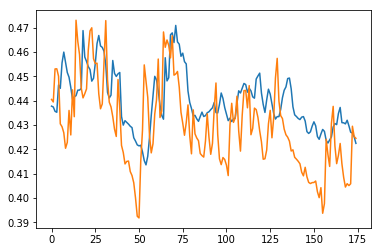

In [7]:
plt.plot(y_predict)
plt.plot(y_test[:,0,0,0])
#plt.plot(x_test[:,:, 0,0,-1])

from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_test[:,0,0,0], y_predict,))
print(np.sqrt(mean_squared_error(y_test[:,0,0,0], y_predict)))
from scipy.stats import pearsonr

print(np.corrcoef(y_test[:,0,0,0, 0], y_predict[:,0]))